## importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [4]:
## providing the location
train_location='alien_vs_predator/data/train'
test_location='alien_vs_predator/data/validation'

In [5]:
## importing the libraries used to input the image folder
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [6]:
##creating the image data generator
train_datagen=ImageDataGenerator(rescale=1. /255,zoom_range=2,horizontal_flip=True,shear_range=.2)
validation_datagen=ImageDataGenerator(rescale=1. /255)


In [7]:
## taking the image from the folder throw image data generator
train_generator=train_datagen.flow_from_directory(train_location,batch_size=10,target_size=(224,224),class_mode='binary',shuffle=True)
validation_generator=validation_datagen.flow_from_directory(test_location,target_size=(224,224),batch_size=10,shuffle=True,class_mode='binary')


Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [8]:
## class indices of generator
train_generator.class_indices

{'alien': 0, 'predator': 1}

In [9]:
dict={0:'alien',1:'predator'}

In [10]:
dict[0]

'alien'

In [11]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten,Dense

In [12]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
for layer in vgg.layers:
    layer.trainable=False

In [14]:
x=Flatten()(vgg.output)
x=Dense(100,activation='relu')(x)
final=Dense(1,activation='sigmoid')(x)


In [15]:
model=Model(inputs=vgg.input,outputs=final)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist=model.fit_generator(train_generator,epochs=6,steps_per_epoch=len(train_generator),validation_data=validation_generator,validation_steps=len(validation_generator))

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
70/70 [==============================] - 683s 10s/step - loss: 0.8982 - acc: 0.6214 - val_loss: 0.4206 - val_acc: 0.8150
Epoch 2/6
70/70 [==============================] - 674s 10s/step - loss: 0.6356 - acc: 0.6950 - val_loss: 1.1703 - val_acc: 0.5750
Epoch 3/6
70/70 [==============================] - 585s 8s/step - loss: 0.5564 - acc: 0.7115 - val_loss: 0.3535 - val_acc: 0.8250
Epoch 4/6
70/70 [==============================] - 580s 8s/step - loss: 0.4859 - acc: 0.7521 - val_loss: 0.2999 - val_acc: 0.8900
Epoch 5/6
70/70 [==============================] - 615s 9s/step - loss: 0.5091 - acc: 0.7221 - val_loss: 0.3750 - val_acc: 0.8050
Epoch 6/6
70/70 [==============================] - 590s 8s/step - loss: 0.4913 - acc: 0.7479 - val_loss: 0.6712 - val_acc: 0.7050


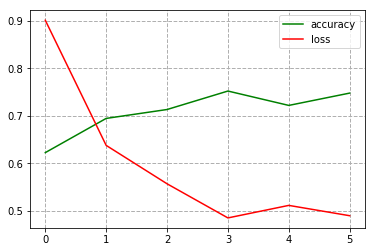

In [19]:
##visualization of accuracy and loss
plt.figure()
plt.plot(hist.history['acc'],'g',label='accuracy')
plt.plot(hist.history['loss'],'r',label='loss')
plt.legend(frameon=True)
plt.grid(linestyle='--',linewidth=1)
plt.show()

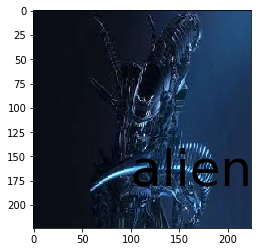

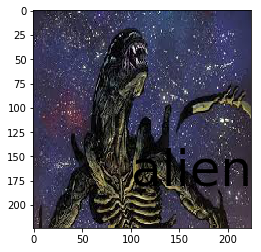

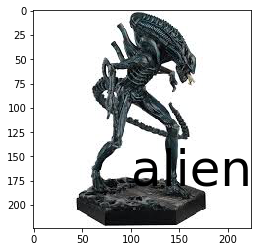

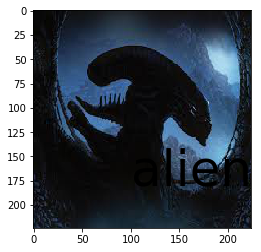

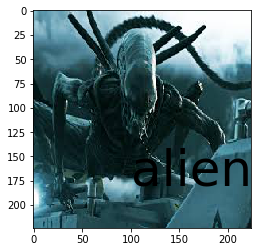

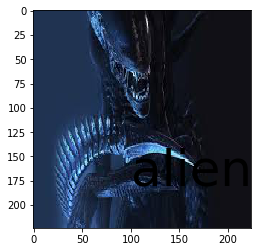

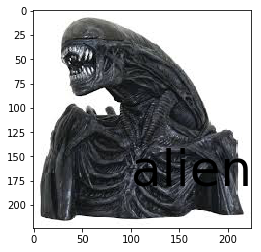

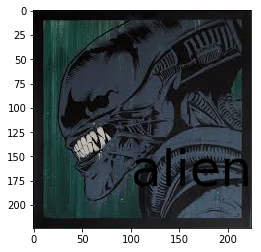

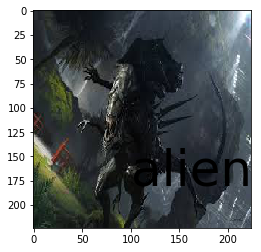

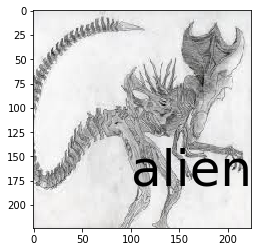

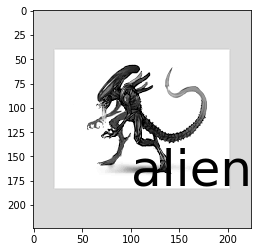

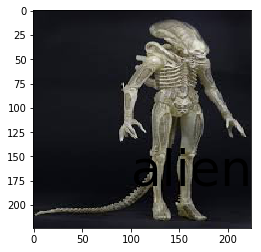

In [41]:
##prediction for alien
j=0
for i in os.listdir('alien_vs_predator/data/validation/alien'):
    j=j+1
    array=load_img('alien_vs_predator/data/validation/alien/'+i,target_size=(224,224,3))
    array=img_to_array(array)
    array=array/255
    image=np.expand_dims(array,axis=0)
    plt.figure()
    plt.text(100,180,dict[int(model.predict(image))],fontsize=50)
    plt.imshow(array)
    if j==12:
        break

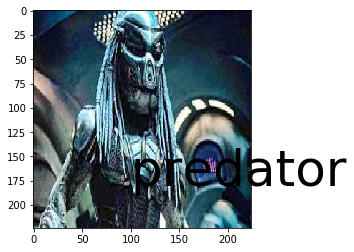

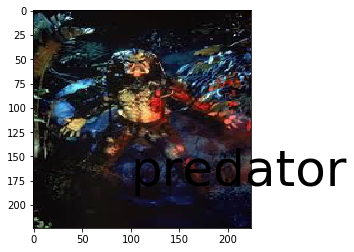

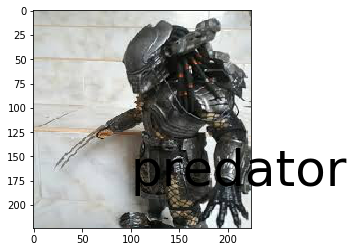

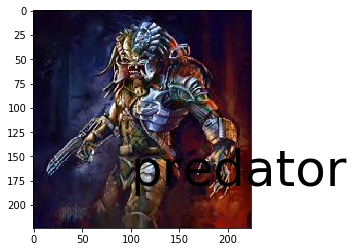

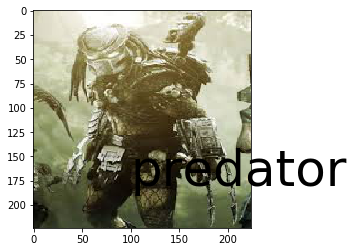

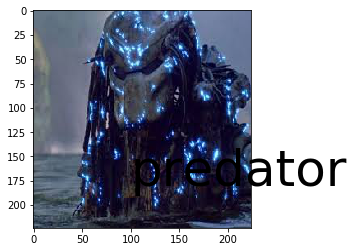

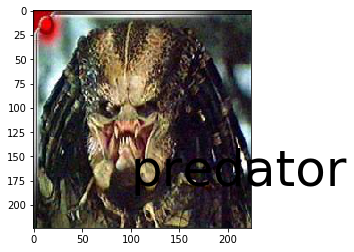

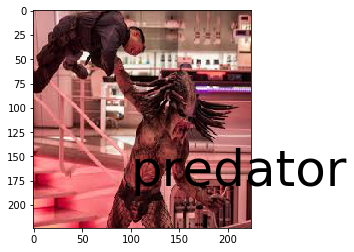

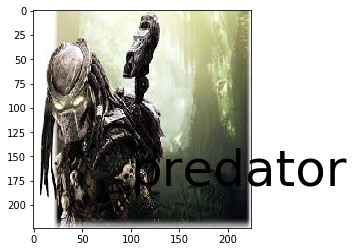

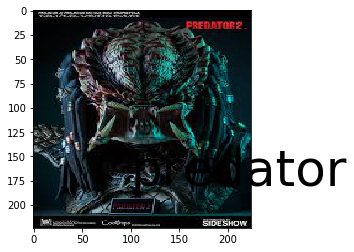

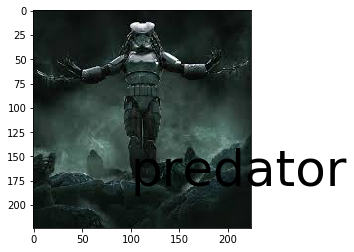

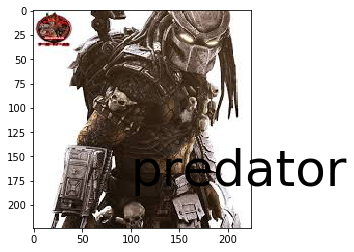

In [47]:
##prediction for predator
j=0
for i in os.listdir('alien_vs_predator/data/validation/predator'):
    j=j+1
    array=load_img('alien_vs_predator/data/validation/predator/'+i,target_size=(224,224,3))
    array=img_to_array(array)
    array=array/255
    image=np.expand_dims(array,axis=0)
    plt.figure()
    plt.text(100,180,dict[math.ceil(model.predict(image))],fontsize=50)
    plt.imshow(array)
    if j==12:
        break